# Convolution basics

In this script we see the basics of convolution functions, their parameters, and the main operations/layers used in convolutional neural networks.

Check the documentation for more details: https://pytorch.org/docs/stable/nn.html#convolution-layers

In [1]:
import torch
import torch.nn as nn
import numpy as np
from skimage import io
from matplotlib import pyplot as plt

### Convolution

Convolution is a mathematical operation that corresponds to **filtering** the data.

For instance, in 1D convolution, we apply a 1D filter (or "kernel") to a signal (e.g., audio waveform, EEG / MEG, etc.). The kernel slides over the whole signal to compute the convolution product.

<center><a href="https://e2eml.school/convolution_one_d.html">
    <img src="https://e2eml.school/images/conv1d/aa_copy.gif"></a></center>

In this lab we will work with images, so we manipulate 2D convolution. In this case, the filter is a small matrix that slides over the input image and is multiplied by it to produce the output image. The convolution is said to be in "2D" because the kernel slides over 2 dimensions (height and width).

<center><a href="https://danielnouri.org/notes/2014/12/17/using-convolutional-neural-nets-to-detect-facial-keypoints-tutorial/">
    <img src="http://deeplearning.stanford.edu/wiki/images/6/6c/Convolution_schematic.gif"></a></center>

On the example above, the input image (in green) is of size $5\times5$. We apply a kernel of size $3\times3$ with the following values:

$$
\begin{bmatrix}
1 & 0 & 1\\
0 & 1 & 0\\
1 & 0 & 1
\end{bmatrix}
$$

The kernel slides over the image: this means that we take a sub-block of size $3 \times 3$ (in yellow). Then, we multiply the value of the pixel with the corresponding value of the kernel; we do that for all pixels in the block and sum the results. This yields the convolution product, which is stored in the output image (on the right).

It's important to understand that applying convolution **reduces the size** of the input image.

Note that there is also 3D convolution, where the kernel slides over 3 dimensions. For instance, in video the kernel is a "cube" that slides over height, width, and time. It's theoretically possible to define convolution in any dimension, but it's not really used in practice (most applications use 1D, 2D or 3D convolution).

(343, 550)


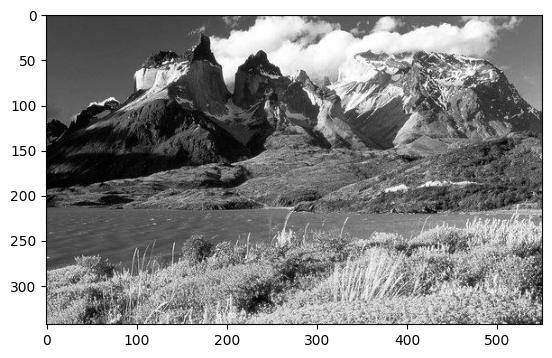

In [2]:
# Load the provided example image as black and white, and normalize it so the values range in [0, 1]
image_np = io.imread('tdp.jpeg', as_gray=True)
print(image_np.shape)
image_np = image_np / np.max(image_np)

# Display the image
plt.imshow(image_np, cmap='gray')
plt.show()

# Convert the image into a pytorch float tensor
image_t = torch.tensor(image_np).float()

In [3]:
# The image tensor above has size [height, width].
# However, in pytorch we usually manipulate batches of images of shape (batch_size, num_channels, height, width).
# So, we have to add extra dimensions (unsqueeze) corresponding to the batch_size and num_channels
image_t = image_t.unsqueeze(0).unsqueeze(0)
print(image_t.shape)

torch.Size([1, 1, 343, 550])


In [4]:
# To create the convolution function, we specify:
# - the number of input channels (= the depth of the input image, usually 1 for black and white images, and 3 for RGB color images
# - the number of output channels (which is equal to the number of kernels)
# - the kernel size (the dimension of the filter)
# - weather we use bias or not
num_channels_in = 1
num_channels_out = 1
kernel_size = 2
my_conv = nn.Conv2d(num_channels_in, num_channels_out, kernel_size=kernel_size, bias=False)

# You can print the kernel weights: when using Conv2d, the weights are randomly initialized
print(my_conv.weight)

Parameter containing:
tensor([[[[ 0.4646,  0.1171],
          [ 0.4169, -0.4072]]]], requires_grad=True)


In [5]:
# It is possible to set the value of the kernel weights.
# For instance, let us set all of them to 1
my_conv.weight = nn.Parameter(torch.ones_like(my_conv.weight))
print(my_conv.weight)

Parameter containing:
tensor([[[[1., 1.],
          [1., 1.]]]], requires_grad=True)


(342, 549)


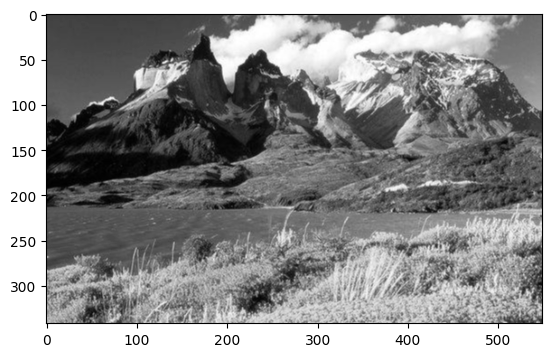

In [6]:
# Pass the image to the convolution
output = my_conv(image_t)

# Squeeze the output to remove the useless dimensions (batch_size and num_channels), and go back to numpy
output_np = output.squeeze().detach().numpy()

# Plot the output image
print(output_np.shape)
plt.imshow(output_np, cmap='gray')
plt.show()

# Since we set the kernel weights to 1, this convolution is equivalent to summing
# the adjacent pixels: the output image is then slightly blurred

(339, 546)


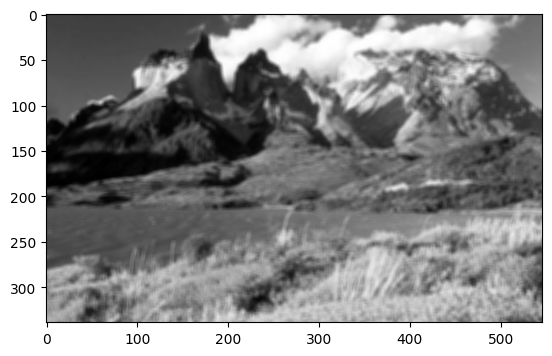

In [8]:
# TO DO:
# - create a convolution layer as above, (1 input and output channel, no bias)
# - change the size of the kernel (try 5, 10, and 20).
# - set the kernel weights at 1.
# - apply convolution to the input image
# - plot the output images and print its shape.
# num_channels_in = 1
# num_channels_out = 1
kernel_size = 2
my_conv = nn.Conv2d(1, 1, kernel_size=5, bias=False)
my_conv.weight = nn.Parameter(torch.ones_like(my_conv.weight))
output = my_conv(image_t)
output_np = output.squeeze().detach().numpy()
print(output_np.shape)
plt.imshow(output_np, cmap='gray')
plt.show()

<span style="color:red">**Q1**</span> Put the images above in your report. What do you see?

Shape : (343, 531)


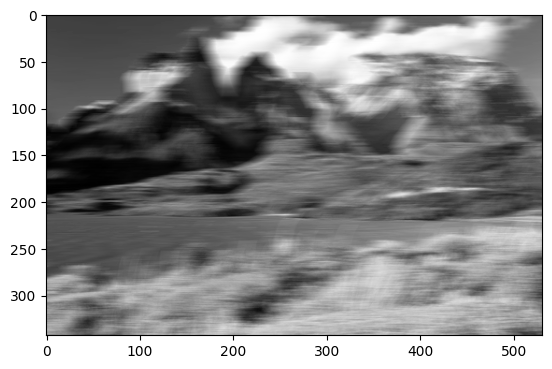

In [9]:
# We can use rectangular (= non-square) kernels, with a different lengths in height and width
my_conv = nn.Conv2d(num_channels_in, num_channels_out, kernel_size=(1, 20))
my_conv.weight = nn.Parameter(torch.ones_like(my_conv.weight), requires_grad=False)
output = my_conv(image_t)
output_np = output.squeeze().detach().numpy()

print('Shape :', output_np.shape)
plt.imshow(output_np, cmap='gray')
plt.show()

torch.Size([1, 1, 343, 550])


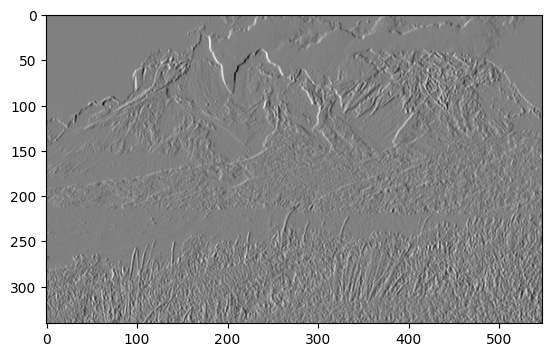

In [10]:
# Convolution can be used for many image processing applications.
# For instance, we can define a filter to detect edges in an image
edge_filter = torch.tensor([[[[-0.5, 0., 0.5], [-1., 0., 1.], [-0.5, 0., 0.5]]]])

# Then, we define a convolution and set the weights (=the kernel parameters) to this filter
my_conv = nn.Conv2d(1, 1, kernel_size=3, bias=False)
my_conv.weight = nn.Parameter(edge_filter, requires_grad=False)

# And now we apply convolution to the input image and get the edges
print(image_t.shape)
output = my_conv(image_t)
output_np = output.squeeze().detach().numpy()
plt.imshow(output_np, cmap='gray')
plt.show()

### Padding

As remarked above and in the introduction, applying convolution reduces the dimension of the image as an edge effect. However, it's sometimes good to control the output dimension (e.g., to keep it the same as the input dimension). To do this, we can use **padding**, which consists in adding extra zeros on the four sides of the image: by artifically increasing the input image, we compensate for the dimension reduction in the output.

<center><a href="https://towardsdatascience.com/types-of-convolutions-in-deep-learning-717013397f4d">
    <img src="https://miro.medium.com/max/395/1*1okwhewf5KCtIPaFib4XaA.gif"></a></center>

In the example above, we use ``padding=1`` to add one row of pixels with the value 0 (white pixels within dashed lines) on the edges of the original image (in blue). Then, when we compute the convolution, this compensates for the size reduction due to a kernel size of 3, so the output image (in green) has the same shape as the original image (in blue).

In [11]:
# Create and apply a convolution without or with padding
my_conv = nn.Conv2d(num_channels_in, num_channels_out, kernel_size=3, bias=False)
output = my_conv(image_t)
my_conv_padd = nn.Conv2d(num_channels_in, num_channels_out, kernel_size=3, padding=1, bias=False)
output_padd = my_conv_padd(image_t)

# Check the size
print('Input shape :', image_t.shape)
print('Output shape, no padding: ', output.shape)
print('Output shape, no padding: ', output_padd.shape)

Input shape : torch.Size([1, 1, 343, 550])
Output shape, no padding:  torch.Size([1, 1, 341, 548])
Output shape, no padding:  torch.Size([1, 1, 343, 550])


In [14]:
# TO DO: write a convolution with a kernel_size=5 (1 output channel, no bias)
# How much padding do you need to keep the image size the same?
# Same question with a non-square kernel of size=(9, 13) (padding can also be non-square)
my_conv_padd = nn.Conv2d(num_channels_in, num_channels_out, kernel_size=3, padding=1, bias=False)
my_conv_padd(image_t).shape

torch.Size([1, 1, 343, 550])

### Stride

Sometimes, we don't want to process all the adjacent pixels in an image, but instead to "jump" from blocks of pixels to others. To do that, we can adjust the `stride` parameter of the convolution.

<center><a href="https://towardsdatascience.com/types-of-convolutions-in-deep-learning-717013397f4d">
    <img src="https://miro.medium.com/max/294/1*BMngs93_rm2_BpJFH2mS0Q.gif"></a></center>

On the illustration above, the stride is 2.

Shape :  (172, 275)


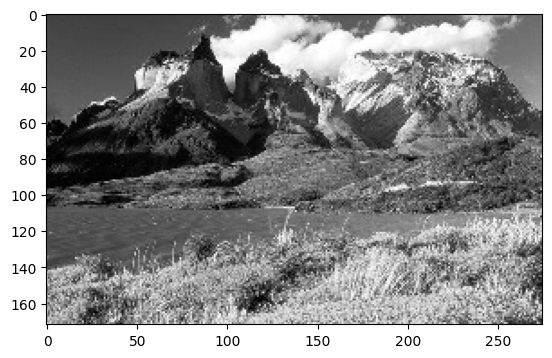

In [15]:
# Create a convolution with a kernel_size=1, weights equal to 1, but with a stride of 2:
# it's equivalent to removing every other pixel (or down-sampling the image)
my_conv = nn.Conv2d(num_channels_in, num_channels_out, kernel_size=1, stride=2, bias=False)
my_conv.weight = nn.Parameter(torch.ones_like(my_conv.weight), requires_grad=False)
output = my_conv(image_t)
output_np = output.squeeze().detach().numpy()

print('Shape : ', output_np.shape)
plt.imshow(output_np, cmap='gray')
plt.show()

Shape stride_10 :  (35, 55)


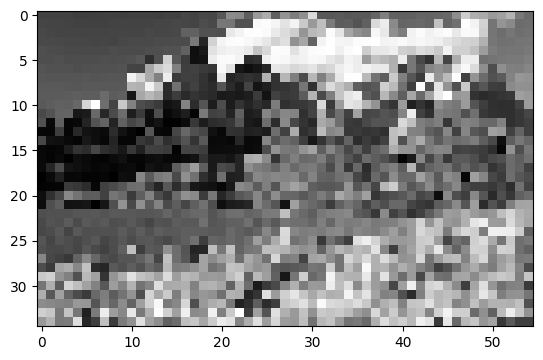

Shape stride_1_3 :  (343, 184)


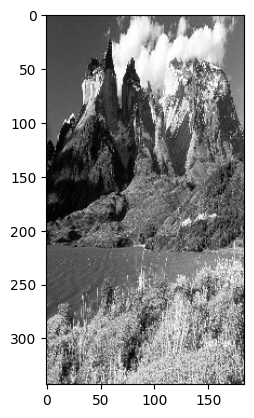

In [18]:
# TO DO: create and apply the same convolution as above, but with a stride of 10
conv1 = nn.Conv2d(num_channels_in, num_channels_out, kernel_size=1, stride=10, bias=False)
conv1.weight = nn.Parameter(torch.ones_like(conv1.weight), requires_grad=False)
output1 = conv1(image_t)
output1 = output1.squeeze().detach().numpy()
print('Shape stride_10 : ', output1.shape)
plt.imshow(output1, cmap='gray')
plt.show()
# TO DO: same, but with non-square stride = (1, 3)
conv2 = nn.Conv2d(num_channels_in, num_channels_out, kernel_size=1, stride=(1, 3), bias=False)
conv2.weight = nn.Parameter(torch.ones_like(conv2.weight), requires_grad=False)
output2 = conv2(image_t)
output2 = output2.squeeze().detach().numpy()
print('Shape stride_1_3 : ', output2.shape)
plt.imshow(output2, cmap='gray')
plt.show()

### Pooling

For image classification / object detection, it is common in CNNs to apply a pooling function after convolution. Indeed, convolution produces output images where the important features (e.g., the detected object) might be spread over the image. The goal of pooling is to obtain a more compact representation of the image to avoid this spread (a property known as "local translation invariance"). As a result, a classification network is less sensitive to shift/translation in the image.

<center><a href="https://medium.com/nerd-for-tech/convolutional-networks-b54335f4e21f">
    <img src="https://miro.medium.com/max/700/1*gaD6SJ6kQNVOclE_WkwLNQ.png"></a></center>

The example above uses a max pooling function with a size of 2 and a stride of 2 (by default in pytorch, the stride is equal to the size of the pooling).


torch.Size([1, 1, 68, 109])


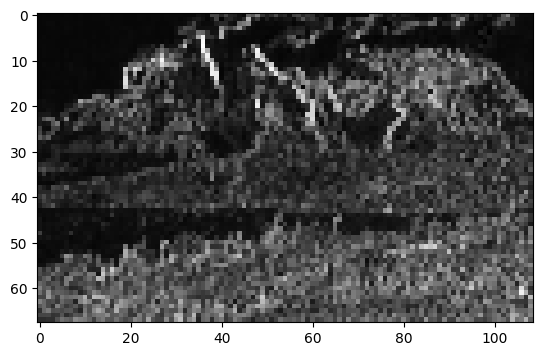

In [19]:
# Let's reuse our edge filter
my_conv = nn.Conv2d(1, 1, kernel_size=3, bias=False)
my_conv.weight = nn.Parameter(edge_filter, requires_grad=False)
output = my_conv(image_t)

# We now add a Max Pooling function after that
my_pool = nn.MaxPool2d(kernel_size =5)
output = my_pool(output)
print(output.shape)

# Plot the result: it should be a downsampled edge image
output_np = output.squeeze().detach().numpy()
plt.imshow(output_np, cmap='gray')
plt.show()

torch.Size([1, 1, 2, 3])


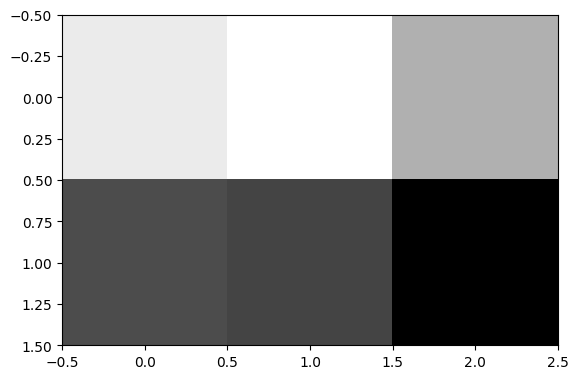

In [20]:
# TO DO: starting from the example above, stack sequentially {convolution + max pooling} three times.
# - the convolution is the same as the example above (with edge filter)
# - the pooling layer has a kernel_size=5
# - the CNN repeats {convolution + max pooling} 3 times (hint: use nn.Sequential)
# Plot the output. What do you see?
conv_block = nn.Sequential(nn.Conv2d(1, 1, kernel_size=3, bias=False), nn.MaxPool2d(kernel_size =5),
nn.Conv2d(1, 1, kernel_size=3, bias=False), nn.MaxPool2d(kernel_size =5),
nn.Conv2d(1, 1, kernel_size=3, bias=False), nn.MaxPool2d(kernel_size =5))
conv_block.weight = nn.Parameter(edge_filter, requires_grad=False)
output = conv_block(image_t)
print(output.shape)

# Plot the result: it should be a downsampled edge image
output_np = output.squeeze().detach().numpy()
plt.imshow(output_np, cmap='gray')
plt.show()

<span style="color:red">**Q2**</span> Put the image above in your report. How do you interprete it?